### Problem 3 - RANSAC
##### When data is scattered, the least squares method to fit a curve might not be the best choice. In this problem, you are given data for health insurance costs based on the person’s age. There are other fields as well, but you have to fit a line only for age and insurance cost data.

###### The data is stored in the file - 'dataset.csv'

>> Read and plot csv file

In [35]:
import csv
age = []
cost = []
with open('dataset.csv', 'r' ) as theFile:
    reader = csv.DictReader(theFile)
    for line in reader:
        age.append(float(line['age']))
        cost.append(float(line['charges']))

##### 1. Compute the covariance matrix (from scratch) and find its eigenvalues and eigenvectors. 
###### Plot the eigenvectors on the same graph as the data.

In [36]:
# Calculate mean age and cost
mean_age = sum(age) / len(age)
mean_cost = sum(cost) / len(cost)
var_age = 0.0
var_cost = 0.0
covar_ = 0.0
covar_cost = 0.0
tls_dem = 0.0
for i in range(len(age)) :
    var_age += (age[i]-mean_age)**2
    var_cost += (cost[i]-mean_cost)**2
    covar_ += (age[i]-mean_age)*(cost[i]-mean_cost)
    tls_dem += (age[i]-mean_age)**2
var_age/=len(age)
var_cost/=len(age)
covar_/=len(age)

print('Mean age: ',mean_age, ', Mean cost: ',mean_cost, ', Variance age: ',var_age, ', Variance cost: ',var_cost, ', Covariance: ',covar_)

Mean age:  39.19692307692308 , Mean cost:  12417.575373969228 , Variance age:  196.84122130177533 , Variance cost:  122218100.00298595 , Covariance:  52371.79820041833


#### Covariance Matrix:

Covariance Matrix [[1.96841221e+02 5.23717982e+04]
 [5.23717982e+04 1.22218100e+08]]
Eigen Values :
 [1.74399299e+02 1.22218122e+08] 
Eigen Vector :
 [[-9.99999908e-01 -4.28511555e-04]
 [ 4.28511555e-04 -9.99999908e-01]]
[[-9.99999908e-01]
 [ 4.28511555e-04]]
[[-4.28511555e-04]
 [-9.99999908e-01]]


Text(0.5, 1.0, 'Age vs Insurance plot with eigen vectors')

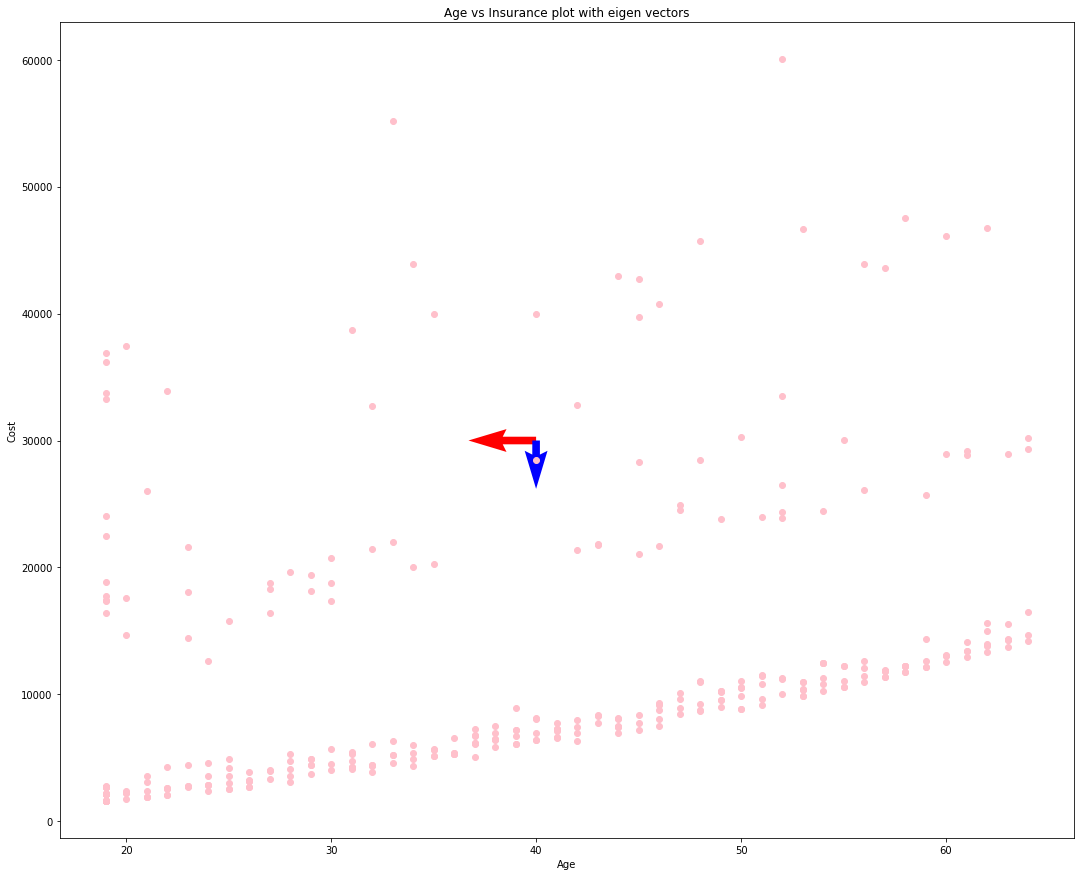

In [42]:
import numpy as np
from numpy import linalg as LA

covariance_mat = np.matrix([[var_age,covar_],[covar_,var_cost]])
print('Covariance Matrix',covariance_mat)
eigen_values, eigen_vector = LA.eig(covariance_mat)
print('Eigen Values :\n',eigen_values, '\nEigen Vector :\n', eigen_vector)

# find out covariance with respect  columns
cov_mat = np.stack((age, cost), axis = 0)
 
import matplotlib.pyplot as plot

fig1 = plot.figure(figsize=(40,15))
plot.subplot(121)


# Plotting Eigen vectors
origin = [40, 30000]

eig_vec1 = np.array(eigen_vector[:,0])
eig_vec2 = np.array(eigen_vector[:,1])


print(eig_vec1)
print(eig_vec2)

plot.quiver(*origin, *eig_vec1, color=['r'], scale=15)
plot.quiver(*origin, *eig_vec2, color=['b'], scale=21)

plot.xlabel('Age')
plot.ylabel('Cost')
plot.scatter(age,cost,c ="pink")
plot.title('Age vs Insurance plot with eigen vectors')

#### 2.1 Fit a line to the data using linear least square method

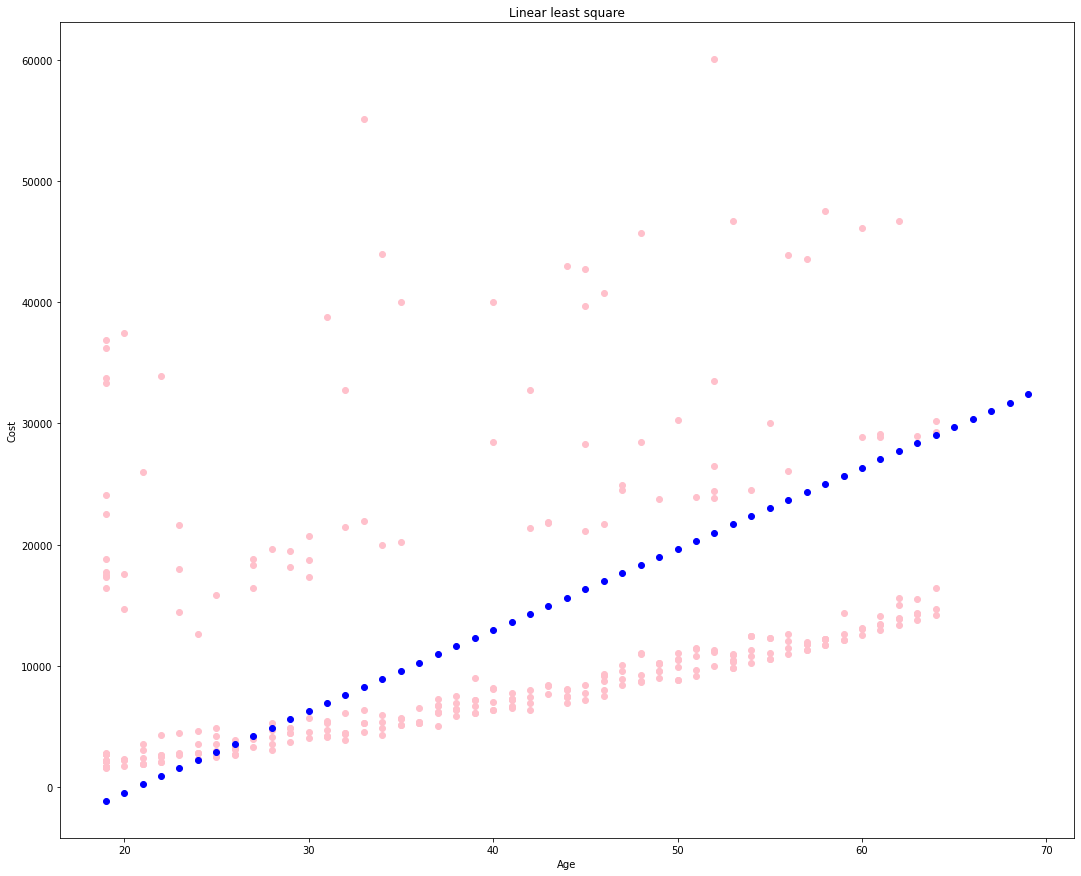

In [38]:
# Calculating sum of all x, y, x2 and xy
sum_age = 0.0
sum_cost = 0.0
sum_age2 = 0.0
sum_age_cost = 0.0
for i in range(len(age)):
    sum_age += age[i]
    sum_cost += cost[i]
    sum_age2 += (age[i]+age[i])
    sum_age_cost += (age[i]*cost[i])

# Calculate slope
m = ((len(age)*sum_age_cost)-(sum_age*sum_cost))/((len(age)*sum_age2)-sum_age2)
b = (sum_cost-(m*sum_age))/len(age)

# Create the vectors X and Y
x = np.array(np.arange(19,70))
y = m*x + b



fig1 = plot.figure(figsize=(40,15))
plot.subplot(121)
plot.xlabel('Age')
plot.ylabel('Cost')
plot.scatter(age,cost,c ="pink")
plot.title('Dataset')

plot.scatter(x,y,c='blue')
plot.title('Linear least square')
plot.savefig('LLS.png')


#### Line fitting using total least square (aka orthogonal linear regression)

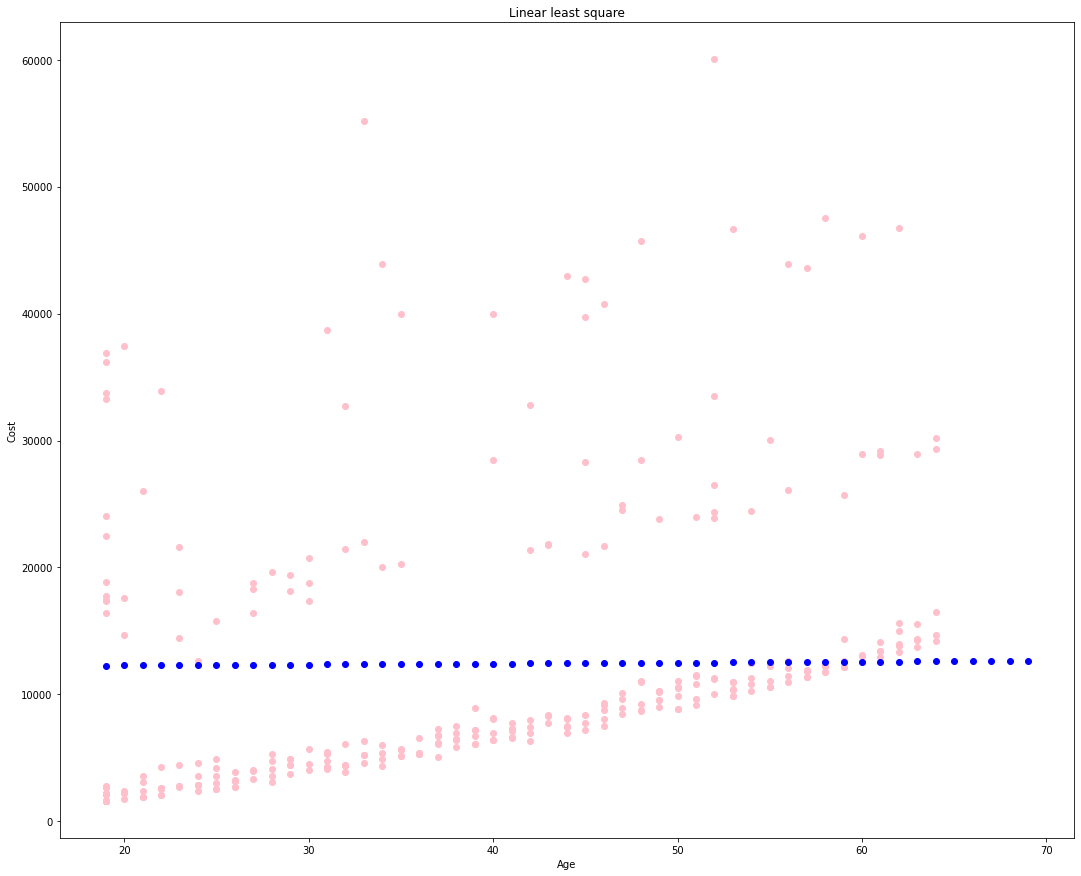

In [39]:
w = var_cost - var_age
r = 2*covar_*len(age)
b = ( w + np.sqrt( (w**2) + (r**2) ) )/r
a = mean_cost-mean_age*b

# Create the vectors X and Y
x_ = np.array(np.arange(19,70))
y_ = b*x_ + a

fig1 = plot.figure(figsize=(40,15))
plot.subplot(121)
plot.xlabel('Age')
plot.ylabel('Cost')
plot.scatter(age,cost,c ="pink")
plot.title('Dataset')

plot.scatter(x_,y_,c='blue')
plot.title('Linear least square')
plot.savefig('LLS.png')